In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


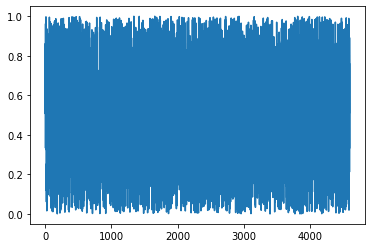

In [ ]:
data = pd.read_csv('data.csv')
print(data.info())
min_price = min(data['price'])
max_price = max(data['price'])
delta = max_price-min_price
data

In [ ]:
def ready_to_process(data) :
  data_object = data.select_dtypes(include='object')
  data_number = data.drop(columns= data_object.keys())
  data_object = data_object.fillna('NA')
  scaler = MinMaxScaler()
  for n in data_object.keys():
    x=data_object[n]
    x= x.astype("category").cat.codes
    x = scaler.fit_transform(x.values.reshape((-1, 1)))
    data_object[n]=x
  for n in data_number.keys():
    data_number[n]= data_number[n].fillna(data_number.mean())
    data_number[n] = scaler.fit_transform(data_number[n].values.reshape((-1, 1)))
  return pd.concat([data_object , data_number],axis=1)




In [ ]:
ready_data = ready_to_process(data)
ready_data

,date,street,city,statezip,country,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0.000000,0.336428,0.837209,0.815789,0.0,0.011771,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.107301,0.000000,0.482456,0.995531
1,0.000000,0.861848,0.813953,0.763158,0.0,0.089658,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.331858,0.058091,0.184211,0.000000
2,0.000000,0.506410,0.418605,0.342105,0.0,0.012862,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,0.000000,0.578947,0.000000
3,0.000000,0.942308,0.069767,0.092105,0.0,0.015795,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,0.207469,0.552632,0.000000
4,0.000000,0.961981,0.720930,0.407895,0.0,0.020684,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,0.165975,0.666667,0.989076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.985507,0.761936,0.813953,0.815789,0.0,0.011590,0.333333,0.21875,0.086560,0.005330,0.0,0.0,0.0,0.75,0.126106,0.000000,0.473684,0.982622
4596,0.985507,0.212202,0.069767,0.078947,0.0,0.020095,0.333333,0.31250,0.082764,0.006460,0.4,0.0,0.0,0.50,0.120575,0.000000,0.728070,0.997517
4597,0.985507,0.891468,0.744186,0.486842,0.0,0.015679,0.333333,0.31250,0.200456,0.005939,0.4,0.0,0.0,0.50,0.292035,0.000000,0.956140,0.000000
4598,1.000000,0.773210,0.813953,0.934211,0.0,0.007649,0.444444,0.25000,0.130600,0.005581,0.0,0.0,0.0,0.50,0.077434,0.211618,0.649123,0.000000


In [ ]:
Y = ready_data['price'].to_numpy().reshape((-1, 1))
X = ready_data.drop(columns='price').to_numpy()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#model

In [ ]:
activation1 = 'relu'
layer1 = 2
model1 = Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(1024, activation=activation),
    layers.Dense(1024, activation=activation),
    layers.Dense(1, activation='linear')
])
model1.compile(optimizer='adam',
              loss='mae',
              metrics=['mse'])
print(model1.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1024)              18432     
                                                                 
 dense_16 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_17 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 1,069,057
Trainable params: 1,069,057
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
activation2 = 'relu'
layer2 = 4
model2 = Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(1024, activation=activation),
    layers.Dense(1024, activation=activation),
    layers.Dense(1024, activation=activation),
    layers.Dense(1024, activation=activation),
    layers.Dense(1, activation='linear')
])
model2.compile(optimizer='adam',
              loss='mae',
              metrics=['mse'])
print(model2.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 1024)              18432     
                                                                 
 dense_68 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_69 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_70 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_71 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 3,168,257
Trainable params: 3,168,257
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
activation3 = 'tanh'
layer3 = 2
model3 = Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(1024, activation=activation),
    layers.Dense(1024, activation=activation),
    layers.Dense(1, activation='linear')
])
model3.compile(optimizer='adam',
              loss='mae',
              metrics=['mse'])
print(model3.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 1024)              18432     
                                                                 
 dense_27 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_28 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 1,069,057
Trainable params: 1,069,057
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
activation4 = 'tanh'
layer4 = 4
model4 = Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(1024, activation=activation),
    layers.Dense(1024, activation=activation),
    layers.Dense(1024, activation=activation),
    layers.Dense(1024, activation=activation),
    layers.Dense(1, activation='linear')
])
model4.compile(optimizer='adam',
              loss='mae',
              metrics=['mse'])
print(model4.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 1024)              18432     
                                                                 
 dense_63 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_64 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_65 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_66 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 3,168,257
Trainable params: 3,168,257
Non-trainable params: 0
_________________________________________________________________
None


#train_model

In [ ]:
train_model1 = model1.fit(x_train, y_train, epochs=100, validation_split=.2, batch_size=256,verbose=0)
y_pred1 = model1.predict(x_test)
se1 = (y_pred1-y_test)**2
sse1 = sum(se1.reshape(-1, 1))
print("Sum of squared errors for %s activation functin and %d hidden layer(s) is: %.3f"%(activation1, layer1, sse1))

Sum of squared errors for relu activation functin and 2 hidden layer(s) is: 0.070


In [ ]:
train_model2 = model2.fit(x_train, y_train, epochs=100, validation_split=.2, batch_size=256,verbose=0)
y_pred2 = model2.predict(x_test)
se2 = (y_pred2-y_test)**2
sse2 = sum(se2.reshape(-1, 1))
print("Sum of squared errors for %s activation functin and %d hidden layer(s) is: %.3f"%(activation2, layer2, sse2))

Sum of squared errors for relu activation functin and 3 hidden layer(s) is: 0.074


In [ ]:
train_model3 = model3.fit(x_train, y_train, epochs=100, validation_split=.2, batch_size=256,verbose=0)
y_pred3 = model3.predict(x_test)
se3 = (y_pred3-y_test)**2
sse3 = sum(se3.reshape(-1, 1))
print("Sum of squared errors for %s activation functin and %d hidden layer(s) is: %.3f"%(activation3, layer3, sse3))

Sum of squared errors for tanh activation functin and 2 hidden layer(s) is: 1.243


In [ ]:
train_model4 = model4.fit(x_train, y_train, epochs=100, validation_split=.2, batch_size=256,verbose=0)
y_pred4 = model4.predict(x_test)
se4 = (y_pred4-y_test)**2
sse4 = sum(se4.reshape(-1, 1))
print("Sum of squared errors for %s activation functin and %d hidden layer(s) is: %.3f"%(activation4, layer4, sse4))

Sum of squared errors for tanh activation functin and 4 hidden layer(s) is: 0.072


#plot_models

In [ ]:
def plot_model(train_model,model,x_test,y_test,delta,minPrice) :
  plt.plot(train_model.history['loss'])
  plt.plot(train_model.history['val_loss'])
  plt.xlabel('epochs')
  plt.ylabel('Loss : mae')
  plt.title('Loss : mae')
  plt.legend(['Train', 'Validation'])
  plt.show()

  plt.plot(train_model.history['mse'])
  plt.plot(train_model.history['val_mse'])
  plt.xlabel('epochs')
  plt.ylabel('mse')
  plt.title('mse')
  plt.legend(['Train', 'Validation'])
  plt.show()

  y_pred = model.predict(x_test)
  price_test = y_test * delta + minPrice
  price_pred = (model.predict(x_test) * delta) + minPrice
  plt.figure(figsize=(10,10))
  #plt.plot(price_pred[:100])
  #plt.plot(price_test[:100])
  plt.scatter(price_test,price_pred)
  plt.xlabel('Real price')
  plt.ylabel('Predicted price')
  plt.title('test-pred')
  #plt.legend(['Train', 'Validation'])
  plt.show()
  
  for i in range(10):
    print('%d the price is %3f and te perd is %3f and delat(y_test-y_pred) %3f' %(i,price_test[i],price_pred[i],price_test[i]-price_pred[i]))
  test_loss,test_mse = model.evaluate(x_test,y_test)
  print(test_loss)
  print(test_mse)

##1

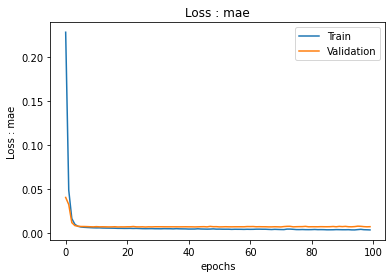

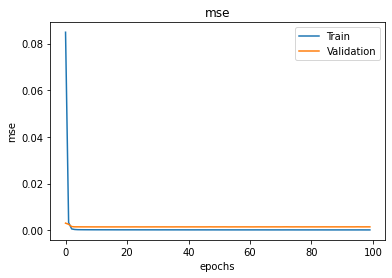

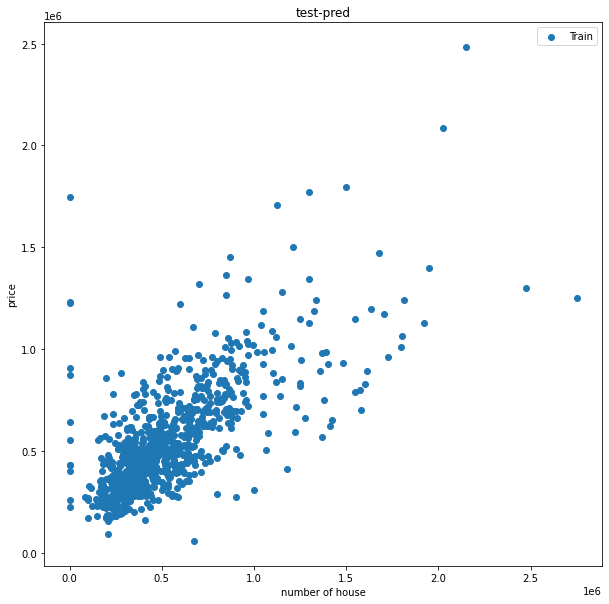

0 the price is 335000.000000 and te perd is 379227.312500 and delat(y_test-y_pred) -44227.312500
1 the price is 309780.000000 and te perd is 340870.312500 and delat(y_test-y_pred) -31090.312500
2 the price is 309487.500000 and te perd is 602972.062500 and delat(y_test-y_pred) -293484.562500
3 the price is 315275.000000 and te perd is 382357.343750 and delat(y_test-y_pred) -67082.343750
4 the price is 575000.000000 and te perd is 614761.375000 and delat(y_test-y_pred) -39761.375000
5 the price is 265000.000000 and te perd is 580298.000000 and delat(y_test-y_pred) -315298.000000
6 the price is 195000.000000 and te perd is 254216.578125 and delat(y_test-y_pred) -59216.578125
7 the price is 690000.000000 and te perd is 852611.125000 and delat(y_test-y_pred) -162611.125000
8 the price is 445000.000000 and te perd is 571959.000000 and delat(y_test-y_pred) -126959.000000
9 the price is 723000.000000 and te perd is 642832.312500 and delat(y_test-y_pred) 80167.687500
29/29 [====================

In [ ]:
plot_model(train_model1,model1,x_test,y_test,delta,min_price)

##2

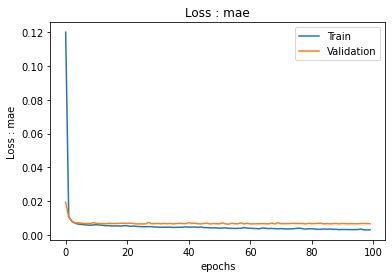

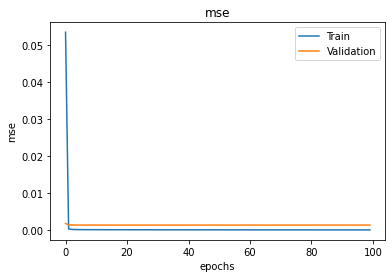

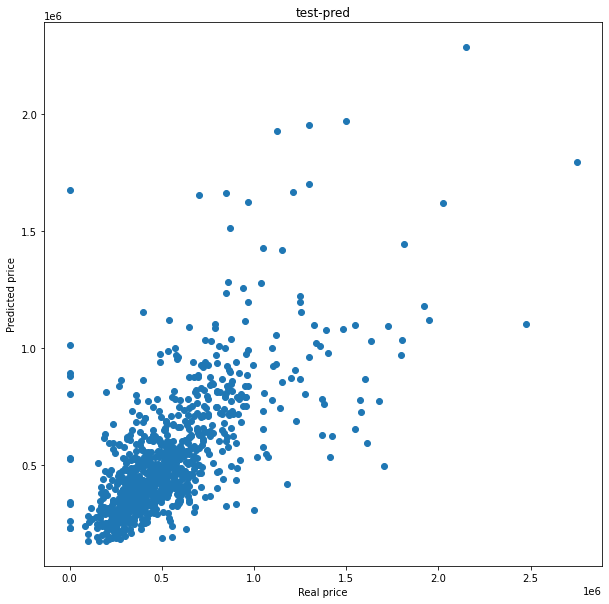

0 the price is 335000.000000 and te perd is 384248.593750 and delat(y_test-y_pred) -49248.593750
1 the price is 309780.000000 and te perd is 354513.031250 and delat(y_test-y_pred) -44733.031250
2 the price is 309487.500000 and te perd is 610336.937500 and delat(y_test-y_pred) -300849.437500
3 the price is 315275.000000 and te perd is 414220.062500 and delat(y_test-y_pred) -98945.062500
4 the price is 575000.000000 and te perd is 531259.500000 and delat(y_test-y_pred) 43740.500000
5 the price is 265000.000000 and te perd is 434312.031250 and delat(y_test-y_pred) -169312.031250
6 the price is 195000.000000 and te perd is 211465.453125 and delat(y_test-y_pred) -16465.453125
7 the price is 690000.000000 and te perd is 798668.687500 and delat(y_test-y_pred) -108668.687500
8 the price is 445000.000000 and te perd is 479137.343750 and delat(y_test-y_pred) -34137.343750
9 the price is 723000.000000 and te perd is 716426.375000 and delat(y_test-y_pred) 6573.625000
29/29 [=======================

In [ ]:
plot_model(train_model2,model2,x_test,y_test,delta,min_price)

##3

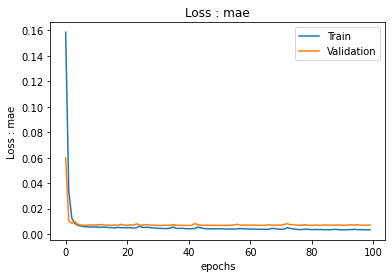

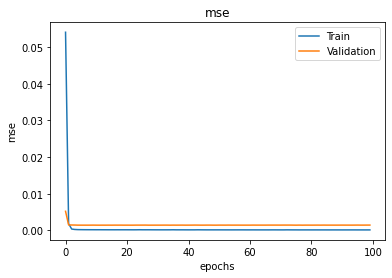

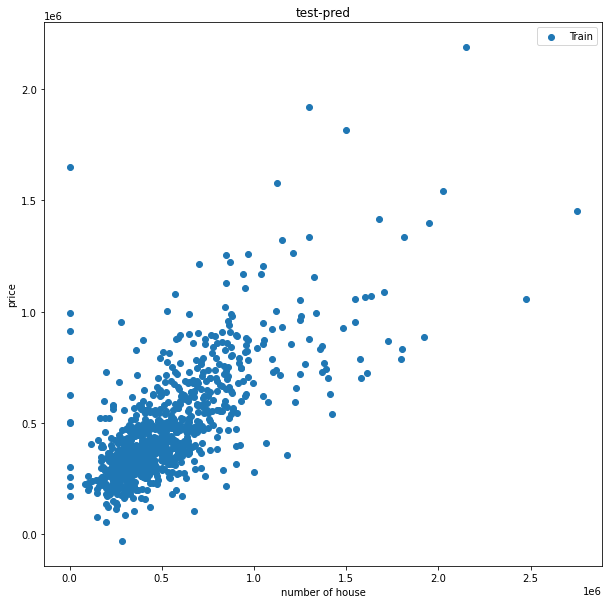

0 the price is 335000.000000 and te perd is 318494.000000 and delat(y_test-y_pred) 16506.000000
1 the price is 309780.000000 and te perd is 383886.000000 and delat(y_test-y_pred) -74106.000000
2 the price is 309487.500000 and te perd is 478311.281250 and delat(y_test-y_pred) -168823.781250
3 the price is 315275.000000 and te perd is 368754.156250 and delat(y_test-y_pred) -53479.156250
4 the price is 575000.000000 and te perd is 491460.250000 and delat(y_test-y_pred) 83539.750000
5 the price is 265000.000000 and te perd is 414243.843750 and delat(y_test-y_pred) -149243.843750
6 the price is 195000.000000 and te perd is 225406.765625 and delat(y_test-y_pred) -30406.765625
7 the price is 690000.000000 and te perd is 744542.437500 and delat(y_test-y_pred) -54542.437500
8 the price is 445000.000000 and te perd is 388310.500000 and delat(y_test-y_pred) 56689.500000
9 the price is 723000.000000 and te perd is 583572.625000 and delat(y_test-y_pred) 139427.375000
29/29 [========================

In [ ]:
plot_model(train_model3,model3,x_test,y_test,delta,min_price)

##4

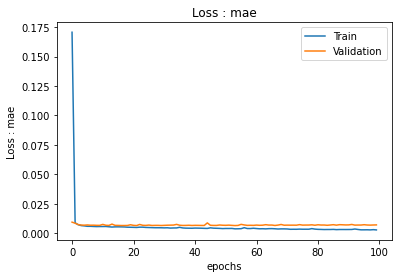

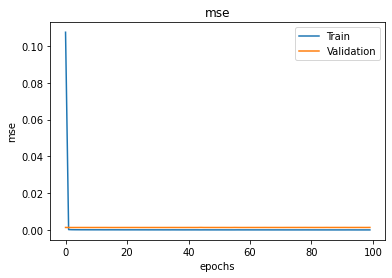

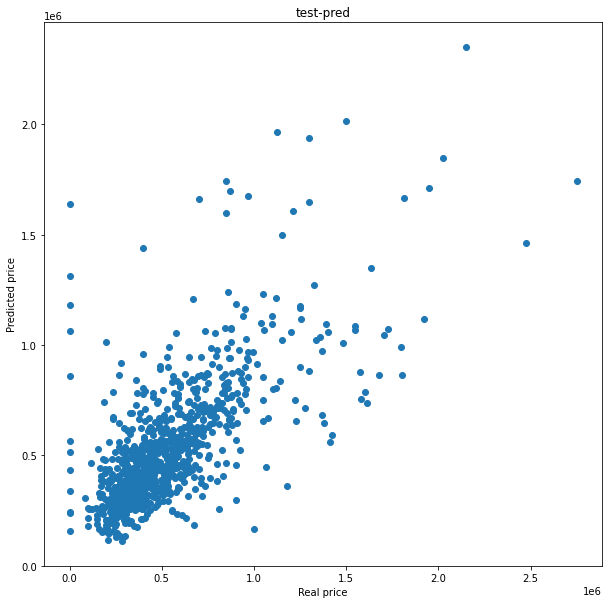

0 the price is 335000.000000 and te perd is 330089.312500 and delat(y_test-y_pred) 4910.687500
1 the price is 309780.000000 and te perd is 324559.343750 and delat(y_test-y_pred) -14779.343750
2 the price is 309487.500000 and te perd is 613424.125000 and delat(y_test-y_pred) -303936.625000
3 the price is 315275.000000 and te perd is 445355.875000 and delat(y_test-y_pred) -130080.875000
4 the price is 575000.000000 and te perd is 581754.375000 and delat(y_test-y_pred) -6754.375000
5 the price is 265000.000000 and te perd is 404339.656250 and delat(y_test-y_pred) -139339.656250
6 the price is 195000.000000 and te perd is 169996.328125 and delat(y_test-y_pred) 25003.671875
7 the price is 690000.000000 and te perd is 805470.812500 and delat(y_test-y_pred) -115470.812500
8 the price is 445000.000000 and te perd is 520319.156250 and delat(y_test-y_pred) -75319.156250
9 the price is 723000.000000 and te perd is 659319.687500 and delat(y_test-y_pred) 63680.312500
29/29 [========================

In [ ]:
plot_model(train_model4,model4,x_test,y_test,delta,min_price)

#model_2

In [ ]:
activation1 = 'relu'
layer1 = 2
model1_b = Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(1024, activation=activation),
    layers.Dense(1024, activation=activation),
    layers.Dense(1, activation='linear')
])
model1_b.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
print(model1_b.summary())

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 1024)              18432     
                                                                 
 dense_89 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_90 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 1,069,057
Trainable params: 1,069,057
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
activation2 = 'relu'
layer2 = 3
model2_b = Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(1024, activation=activation),
    layers.Dense(1024, activation=activation),
    layers.Dense(1024, activation=activation),
    layers.Dense(1024, activation=activation),
    layers.Dense(1, activation='linear')
])
model2_b.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
print(model2_b.summary())

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_91 (Dense)            (None, 1024)              18432     
                                                                 
 dense_92 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_93 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_94 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_95 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 3,168,257
Trainable params: 3,168,257
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
activation3 = 'tanh'
layer3 = 2
model3_b = Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(1024, activation=activation),
    layers.Dense(1024, activation=activation),
    layers.Dense(1, activation='linear')
])
model3_b.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
print(model3_b.summary())

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 1024)              18432     
                                                                 
 dense_97 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_98 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 1,069,057
Trainable params: 1,069,057
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
activation4 = 'tanh'
layer4 = 4
model4_b = Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(1024, activation=activation),
    layers.Dense(1024, activation=activation),
    layers.Dense(1024, activation=activation),
    layers.Dense(1024, activation=activation),
    layers.Dense(1, activation='linear')
])
model4_b.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
print(model4_b.summary())

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 1024)              18432     
                                                                 
 dense_100 (Dense)           (None, 1024)              1049600   
                                                                 
 dense_101 (Dense)           (None, 1024)              1049600   
                                                                 
 dense_102 (Dense)           (None, 1024)              1049600   
                                                                 
 dense_103 (Dense)           (None, 1)                 1025      
                                                                 
Total params: 3,168,257
Trainable params: 3,168,257
Non-trainable params: 0
_________________________________________________________________
None


#train_model

In [ ]:
train_model1_b = model1_b.fit(x_train, y_train, epochs=100, validation_split=.2, batch_size=256,verbose=0)
y_pred1 = model1_b.predict(x_test)
se1 = (y_pred1-y_test)**2
sse1 = sum(se1.reshape(-1, 1))
print("Sum of squared errors for %s activation functin and %d hidden layer(s) is: %.3f"%(activation1, layer1, sse1))

Sum of squared errors for relu activation functin and 2 hidden layer(s) is: 0.076


In [ ]:
train_model2_b = model2_b.fit(x_train, y_train, epochs=100, validation_split=.2, batch_size=256,verbose=0)
y_pred2 = model2_b.predict(x_test)
se2 = (y_pred2-y_test)**2
sse2 = sum(se2.reshape(-1, 1))
print("Sum of squared errors for %s activation functin and %d hidden layer(s) is: %.3f"%(activation2, layer2, sse2))

Sum of squared errors for relu activation functin and 3 hidden layer(s) is: 0.106


In [ ]:
train_model3_b = model3_b.fit(x_train, y_train, epochs=100, validation_split=.2, batch_size=256,verbose=0)
y_pred3 = model3_b.predict(x_test)
se3 = (y_pred3-y_test)**2
sse3 = sum(se3.reshape(-1, 1))
print("Sum of squared errors for %s activation functin and %d hidden layer(s) is: %.3f"%(activation3, layer3, sse3))

Sum of squared errors for tanh activation functin and 2 hidden layer(s) is: 0.073


In [ ]:
train_model4_b = model4_b.fit(x_train, y_train, epochs=100, validation_split=.2, batch_size=256,verbose=0)
y_pred4 = model4_b.predict(x_test)
se4 = (y_pred4-y_test)**2
sse4 = sum(se4.reshape(-1, 1))
print("Sum of squared errors for %s activation functin and %d hidden layer(s) is: %.3f"%(activation4, layer4, sse4))

Sum of squared errors for tanh activation functin and 4 hidden layer(s) is: 0.077


#plot_models

In [ ]:
def plot_model_b(train_model,model,x_test,y_test,delta,minPrice) :
  plt.plot(train_model.history['loss'])
  plt.plot(train_model.history['val_loss'])
  plt.xlabel('epochs')
  plt.ylabel('Loss : mse')
  plt.title('Loss : mse')
  plt.legend(['Train', 'Validation'])
  plt.show()

  plt.plot(train_model.history['mae'])
  plt.plot(train_model.history['val_mae'])
  plt.xlabel('epochs')
  plt.ylabel('mae')
  plt.title('mae')
  plt.legend(['Train', 'Validation'])
  plt.show()

  y_pred = model.predict(x_test)
  price_test = y_test * delta + minPrice
  price_pred = (model.predict(x_test) * delta) + minPrice
  plt.figure(figsize=(10,10))
  #plt.plot(price_pred[:100])
  #plt.plot(price_test[:100])
  plt.scatter(price_test,price_pred)
  plt.xlabel('Real price')
  plt.ylabel('Predicted price')
  plt.title('test-pred')
  #plt.legend(['Train', 'Validation'])
  plt.show()
  
  for i in range(10):
    print('%d the price is %3f and te perd is %3f and delat(y_test-y_pred) %3f' %(i,price_test[i],price_pred[i],price_test[i]-price_pred[i]))
  test_loss,test_mae = model.evaluate(x_test,y_test)
  print(test_loss)
  print(test_mae)

##1

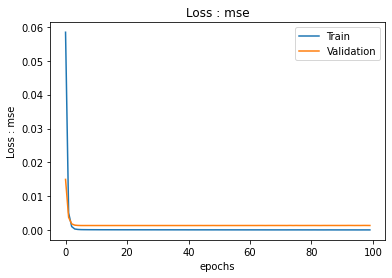

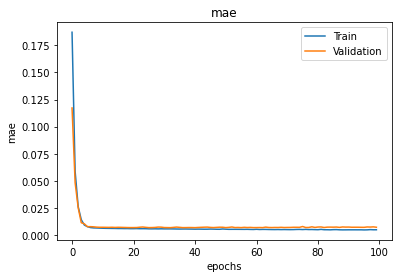

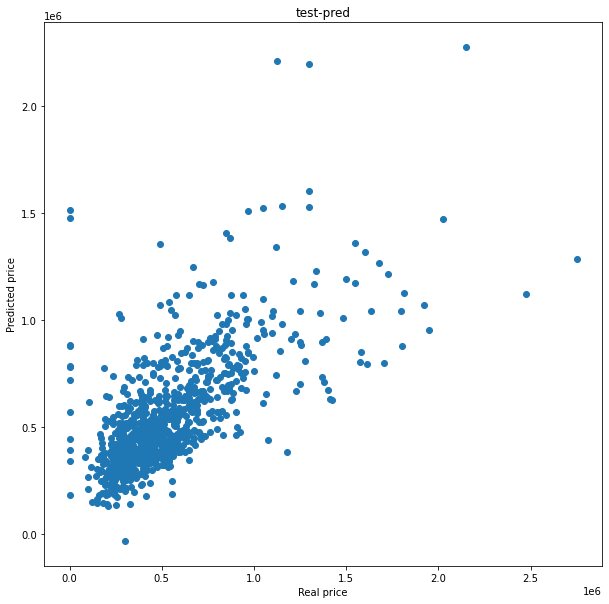

0 the price is 335000.000000 and te perd is 325068.906250 and delat(y_test-y_pred) 9931.093750
1 the price is 309780.000000 and te perd is 339134.000000 and delat(y_test-y_pred) -29354.000000
2 the price is 309487.500000 and te perd is 591471.875000 and delat(y_test-y_pred) -281984.375000
3 the price is 315275.000000 and te perd is 404418.531250 and delat(y_test-y_pred) -89143.531250
4 the price is 575000.000000 and te perd is 650428.812500 and delat(y_test-y_pred) -75428.812500
5 the price is 265000.000000 and te perd is 562616.687500 and delat(y_test-y_pred) -297616.687500
6 the price is 195000.000000 and te perd is 265174.375000 and delat(y_test-y_pred) -70174.375000
7 the price is 690000.000000 and te perd is 791763.625000 and delat(y_test-y_pred) -101763.625000
8 the price is 445000.000000 and te perd is 516327.468750 and delat(y_test-y_pred) -71327.468750
9 the price is 723000.000000 and te perd is 529817.187500 and delat(y_test-y_pred) 193182.812500
29/29 [======================

In [ ]:
plot_model_b(train_model1_b,model1_b,x_test,y_test,delta,min_price)

##2

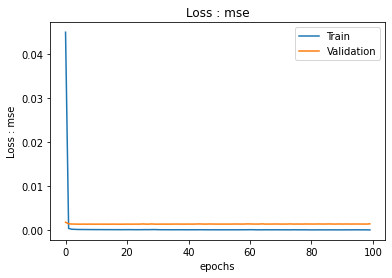

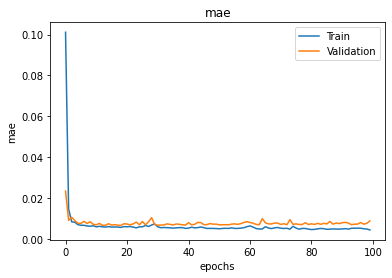

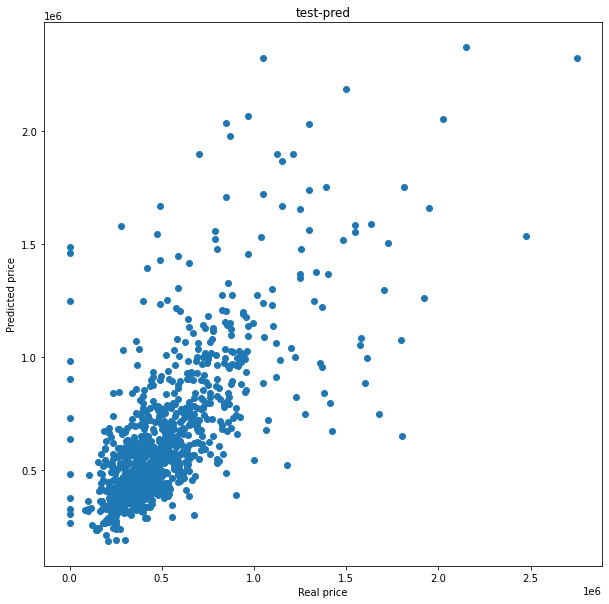

0 the price is 335000.000000 and te perd is 301056.562500 and delat(y_test-y_pred) 33943.437500
1 the price is 309780.000000 and te perd is 436019.937500 and delat(y_test-y_pred) -126239.937500
2 the price is 309487.500000 and te perd is 688023.437500 and delat(y_test-y_pred) -378535.937500
3 the price is 315275.000000 and te perd is 534006.937500 and delat(y_test-y_pred) -218731.937500
4 the price is 575000.000000 and te perd is 752909.187500 and delat(y_test-y_pred) -177909.187500
5 the price is 265000.000000 and te perd is 682480.562500 and delat(y_test-y_pred) -417480.562500
6 the price is 195000.000000 and te perd is 277874.687500 and delat(y_test-y_pred) -82874.687500
7 the price is 690000.000000 and te perd is 929294.937500 and delat(y_test-y_pred) -239294.937500
8 the price is 445000.000000 and te perd is 606521.125000 and delat(y_test-y_pred) -161521.125000
9 the price is 723000.000000 and te perd is 852775.875000 and delat(y_test-y_pred) -129775.875000
29/29 [================

In [ ]:
plot_model_b(train_model2_b,model2_b,x_test,y_test,delta,min_price)

##3

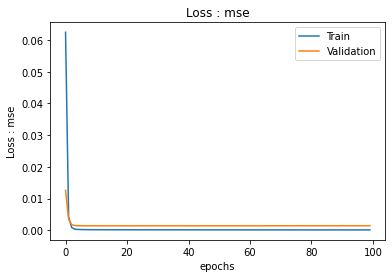

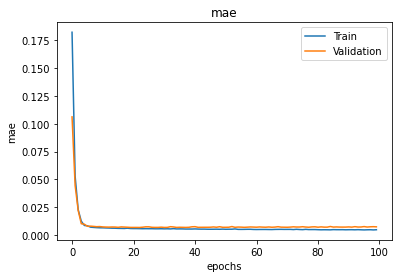

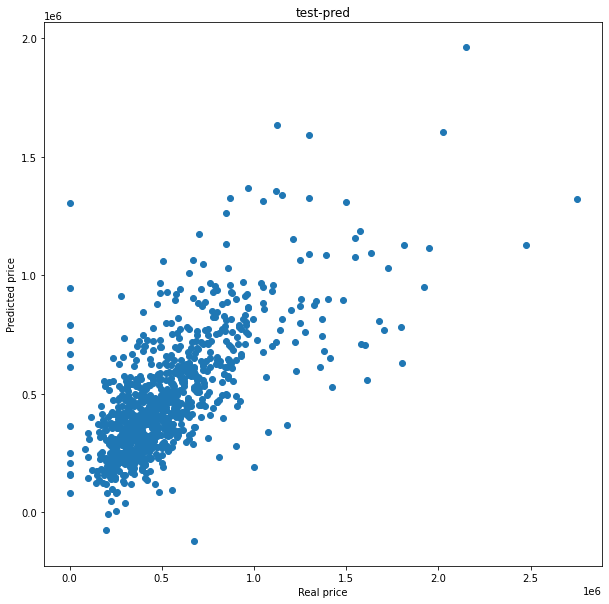

0 the price is 335000.000000 and te perd is 119652.406250 and delat(y_test-y_pred) 215347.593750
1 the price is 309780.000000 and te perd is 333536.593750 and delat(y_test-y_pred) -23756.593750
2 the price is 309487.500000 and te perd is 525586.187500 and delat(y_test-y_pred) -216098.687500
3 the price is 315275.000000 and te perd is 431903.281250 and delat(y_test-y_pred) -116628.281250
4 the price is 575000.000000 and te perd is 600884.125000 and delat(y_test-y_pred) -25884.125000
5 the price is 265000.000000 and te perd is 475726.656250 and delat(y_test-y_pred) -210726.656250
6 the price is 195000.000000 and te perd is 346073.093750 and delat(y_test-y_pred) -151073.093750
7 the price is 690000.000000 and te perd is 765077.875000 and delat(y_test-y_pred) -75077.875000
8 the price is 445000.000000 and te perd is 427312.062500 and delat(y_test-y_pred) 17687.937500
9 the price is 723000.000000 and te perd is 625520.500000 and delat(y_test-y_pred) 97479.500000
29/29 [=====================

In [ ]:
plot_model_b(train_model3_b,model3_b,x_test,y_test,delta,min_price)

##4

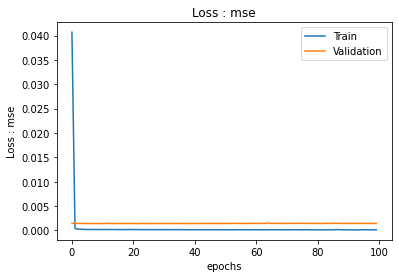

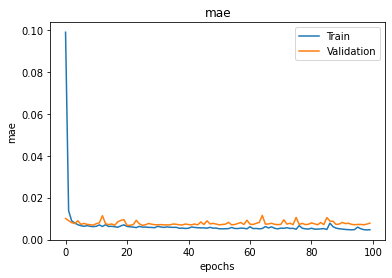

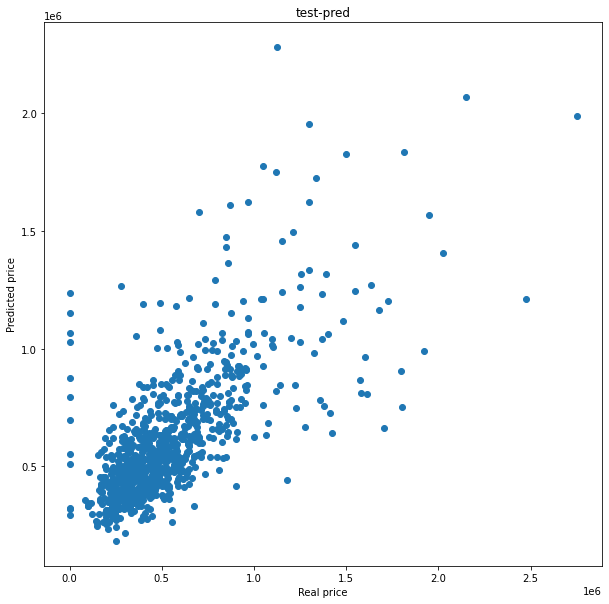

0 the price is 335000.000000 and te perd is 368032.187500 and delat(y_test-y_pred) -33032.187500
1 the price is 309780.000000 and te perd is 456156.375000 and delat(y_test-y_pred) -146376.375000
2 the price is 309487.500000 and te perd is 659216.000000 and delat(y_test-y_pred) -349728.500000
3 the price is 315275.000000 and te perd is 480674.937500 and delat(y_test-y_pred) -165399.937500
4 the price is 575000.000000 and te perd is 691939.187500 and delat(y_test-y_pred) -116939.187500
5 the price is 265000.000000 and te perd is 550151.125000 and delat(y_test-y_pred) -285151.125000
6 the price is 195000.000000 and te perd is 312429.812500 and delat(y_test-y_pred) -117429.812500
7 the price is 690000.000000 and te perd is 922607.812500 and delat(y_test-y_pred) -232607.812500
8 the price is 445000.000000 and te perd is 576318.062500 and delat(y_test-y_pred) -131318.062500
9 the price is 723000.000000 and te perd is 766578.812500 and delat(y_test-y_pred) -43578.812500
29/29 [===============

In [ ]:
plot_model_b(train_model4_b,model4_b,x_test,y_test,delta,min_price)